# Week 7 Problem 2

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/UI-DataScience/info490-fa16/blob/master/Week2/assignments/README.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
%matplotlib inline

In [2]:
from nose.tools import assert_equal
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_almost_equal
import seaborn as sns

# Problem 1.

The purpose of this problem is to give you exposure creating multiple plots displayed together called *subplots*. You may have noticed that the first thing we do when creating a new plot is make a call to `plt.subplots()`. If we want to create one plot, we often call `subplots()` with no arguments unless we want to change the figure size. Now we'll actually put its namesake to use.

Write a function to create a 2 by 2 plot with the following guidelines:

* Make the entire plot 12 by 9
* Use the plotting format as described in the docstring
* make sure the array of axes is arranged the same was as the plot i.e. the top left plot should be in the 0,0 position, the top right should be in 0,1, etc...

Here is an example:


![Example Plot](p2_1_example.png)


You may find some [examples](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) with code helpful.

In [3]:
def plot_2_by_2(x, y, z):
    '''
    Creates a two-by-two plot of x on y, x on z, x on 
    y^2, and x on z^2.
    
    The format for the plot calls is (in terms of (xaxis, yaxis)):
    top left: x, y
    top right: x, z
    bottom left: x, y^2
    bottom right: x, z^2
    
    Parameters
    ----------
    x: A numpy array of data points for the x-axis.
    y: A numpy array of data points for the y-axis.
    z: A numpy array of data points for the other y-axis.
    
    Returns
    -------
    A 2x2 numpy array of matplotlib.axes._subplots.AxesSubplot objects
    '''
    
    #YOUR CODE HERE
    # using the Seaborn library to improve the plot
    sns.set()
    
    # Now we create our figure and axes for the plot we will make.
    f, ax = plt.subplots(2, 2, figsize=(12, 9))
    
    # Make subplots and set the title
    ax[0, 0].plot(x, y)
    ax[0, 0].set_title('x, y')
    ax[0, 1].plot(x, z)
    ax[0, 1].set_title('x, z')
    ax[1, 0].plot(x, y ** 2)
    ax[1, 0].set_title('x, y^2')
    ax[1, 1].plot(x, z ** 2)
    ax[1, 1].set_title('x, z^2')
    
    return ax

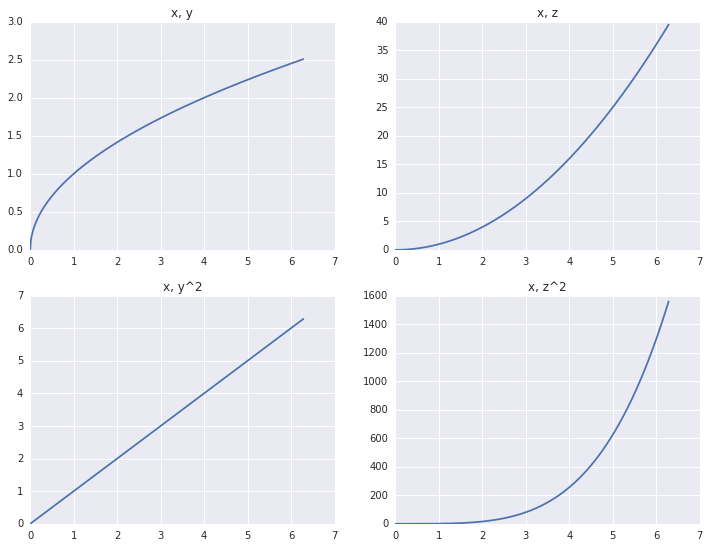

In [4]:
x_arr = np.linspace(0,2*np.pi, 400)
y_arr = x_arr**(1/2)
z_arr = x_arr**2
f, a = plot_2_by_2(x_arr, y_arr, z_arr)

In [5]:
# make data for the plotting
x_arr = np.linspace(0, 2 * np.pi, 400)
y_arr = np.sin(x_arr)
z_arr = np.cos(x_arr)

# get the axes array
axarr = plot_2_by_2(x_arr, y_arr, z_arr)

# make sure it's an array
assert_equal(type(axarr), np.ndarray, 
             msg='axis array should be a numpy array')

## x value tests
assert_almost_equal(axarr[0, 1].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for top right')
assert_almost_equal(axarr[1, 1].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for bottom right')
assert_almost_equal(axarr[0, 0].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for top left')
assert_almost_equal(axarr[1, 0].lines[0].get_data()[0], x_arr, 
                    err_msg='x values are not equivalent for bottom left')
## y value tests
assert_almost_equal(axarr[0, 1].lines[0].get_data()[1], z_arr, 
                    err_msg='y values are not equivalent for top right')
assert_almost_equal(axarr[1, 1].lines[0].get_data()[1], z_arr**2, 
                    err_msg='x values are not equivalent for bottom right')
assert_almost_equal(axarr[0, 0].lines[0].get_data()[1], y_arr, 
                    err_msg='x values are not equivalent for top left')
assert_almost_equal(axarr[1, 0].lines[0].get_data()[1], y_arr**2, 
                    err_msg='x values are not equivalent for bottom left')

# height and width tests
assert_equal(axarr[0,0].get_figure().get_figwidth(), 12.0)
assert_equal(axarr[0,0].get_figure().get_figheight(), 9.0)

# don't show the plot
plt.close()

# Problem 2.

Now we want you to learn to add legends to your plots. Extend the idea of the first assignment and create a plot of $sine$ and $cosine$. Again, **plot sine first, then cosine**. Your function should:

* create a vector of x values from `lower` to `upper` using `np.arange()`
* create vectors sin(x) and cos(x)
* plot sin(x) with label 'sine'
* plot cos(x) with label 'cosine'

Here is an example:

![Problem 2 Example](p2_2_example.png)

In [6]:
def plot_with_legend(lower = -3 , upper = 3):
    """
    Plots the sine and cosine functions with a legend.
    
    Parameters
    ----------
    lower: the lower bound of the x axis
    upper: the upper bound of the x axis
    
    Returns
    -------
    A matplotlib.Axes instance.
    """

    #YOUR CODE HERE
    # using the Seaborn library to improve the plot
    sns.set()
    
    # Now we create our figure and axes for the plot we will make.
    fig, ax = plt.subplots()
    
    # Generate the data we need
    x = np.linspace(lower, upper)
    ysin = np.sin(x)
    ycos = np.cos(x)
    
    # Plot the two line and add legend
    ax.plot(x, ysin, label = 'sine')
    ax.plot(x, ycos, label = 'cosine')
    ax.legend(loc='upper left')
    
    # Set our axis labels
    ax.set_xlabel("x in radians")
    ax.set_ylabel("y")
        
    # Set the title
    ax.set_title("Sine and Cosine values for x between {0} and {1}".format(lower, upper))
    return ax

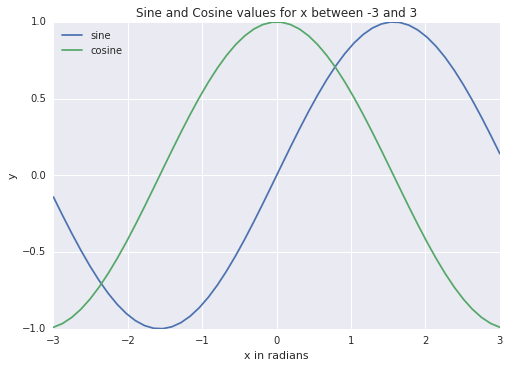

In [7]:
ax_2 = plot_with_legend()

In [8]:
# get the ax object
ax_2 = plot_with_legend(lower=-4, upper=4)
# make sure the legend is right
assert_equal(ax_2.legend().get_texts()[0].get_text(), 'sine')
assert_equal(ax_2.legend().get_texts()[1].get_text(), 'cosine')
# make sure the data for the sine plot is right
x, y1 = ax_2.lines[0].get_data()
assert_almost_equal(y1, np.sin(x))
# make sure the data for the cosine plot is right
x, y2 = ax_2.lines[1].get_data()
assert_almost_equal(y2, np.cos(x))
# make sure you set the bounds right
assert_almost_equal(4, max(x), decimal=1, err_msg='try decreasing step size in np.arange')
assert_almost_equal(-4, min(x), decimal=1, err_msg='try decreasing step size in np.arange')
plt.close()